# data from txt file, and with ZTF+ATLAS data

In [1]:
import sys
sys.path.append('../src')
from ztfanalysis import *
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# read local data via pandas

In [2]:
lc_df = pd.read_csv('../data/ZTF19acmbekd_df.csv',sep=',')
lc_df.rename(columns={'jday':'jdobs','magerr':'emag',
                      'fnu':'Fmcmc','fnuerr':'Fmcmc_unc'}, inplace=True)

# redshift, distance module and milky way ebv is needed

In [3]:
# initialize class
ztfp = ztfsingle('ZTF19acmbekd', z=0.0636, dm=37.24, mkwebv=0.0124, sntype='SN Ibn')

# set self.lc
ztfp.lc = lc_df

# calc Fmcmc
ztfp.add_flux()

ztfp.lc = ztfp.lc.query('Fmcmc != "NaN" and jdobs>2458700 and jdobs<2458840')

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


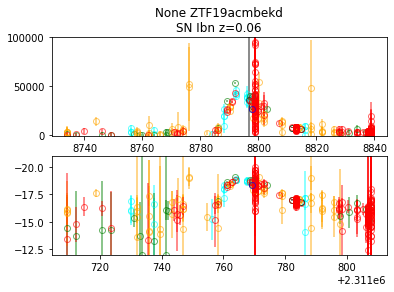

In [4]:
# create 2 plots
fig,(ax, ax2)=plt.subplots(2,1)
ztfp.ax = ax
ztfp.ax2 = ax2

# show
ztfp.plot(plot_bands=['g','r','c','o'], ax_ylim=[-1000, 100000], ax2_ylim=[-12, -21], )

# run Gaussian process

t0 =  0
after GP, t0 =  2458793.091063479


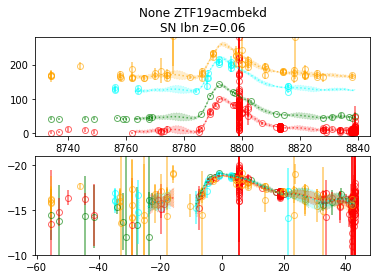

(8700.0, 8900.0)

In [5]:
ztfp.run_gp(gp_type=1, 
            gp_routine='mcmc', 
            gp_mean='bazin', 
            kernel='matern32', 
            fix_scale=True,
            gp_fitr=[-60, 120], 
            gp_plotr=[-30, 120], 
            gp_bands=['g','r','c','o']
           )
print ('t0 = ',ztfp.t0)

ztfp.set_t0_withgp(filt='r') # set t0 with GP in r band
print ('after GP, t0 = ',ztfp.t0)

fig,(ax, ax2)=plt.subplots(2,1)
ztfp.ax = ax
ztfp.ax2 = ax2

ztfp.plot(plot_bands=['g','r','c','o'], ax_ylim=[-10, 280], ax2_ylim=[-10, -21], )
ax.set_xlim([8700, 8900])

# fit with Bazin model

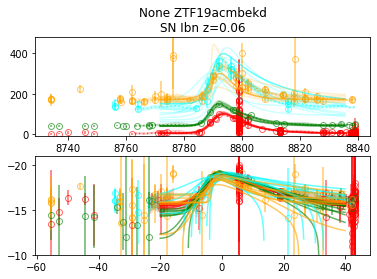

In [10]:
ztfp.run_fit(fit_type=1, 
            fit_routine='lm', 
            fit_bands=['o','g','r','c'],
            fit_mean='bazin', 
            fit_fitr=[-20, 50], 
            fit_plotr=[-50, 50], 
            nsteps=20000,
            verbose=False
           )
fig,(ax, ax2)=plt.subplots(2,1)
ztfp.ax = ax
ztfp.ax2 = ax2
ztfp.plot(plot_bands=['r', 'g', 'c', 'o'], ax_ylim=[-10, 480], ax2_ylim=[-10, -21], )

# parameter distribution

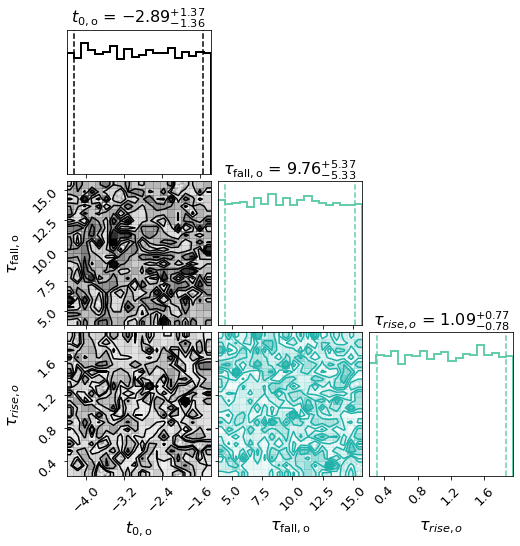

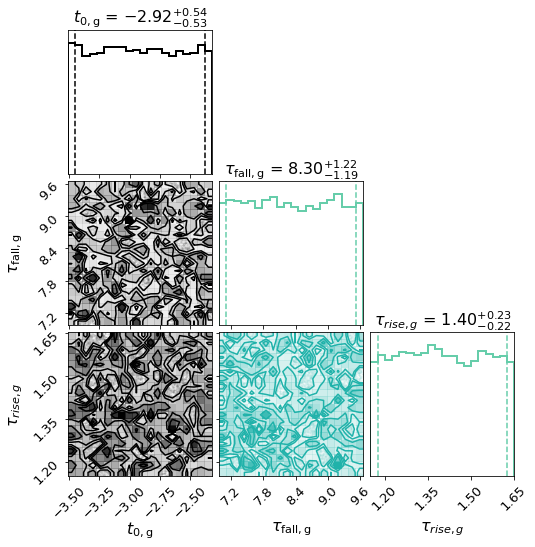

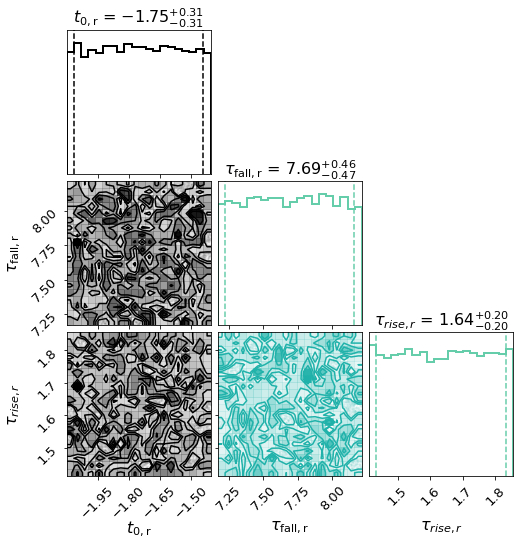

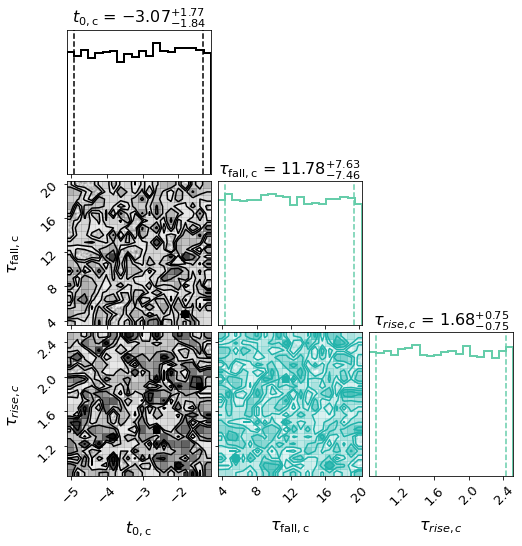

In [11]:
ztfp.corner(show=True, which='fit')

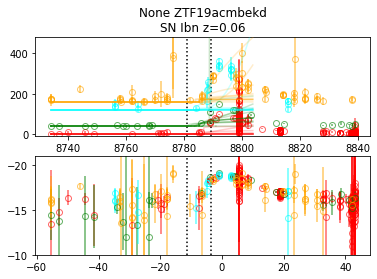

In [16]:
ztfp.explosion_pl(pl_type=2, 
            pl_routine='mcmc', 
            pl_bands=['r', 'g', 'c', 'o'],
            nsteps=20000,
            nwalkers=100,
            rel_flux_cutoff=.6,
            verbose=False,
           )
fig,(ax, ax2)=plt.subplots(2,1)
ztfp.ax = ax
ztfp.ax2 = ax2
ztfp.plot(gp_type=3, fit_type=3, pl_plotmax=10,
          plot_bands=['r', 'g', 'c', 'o'], pl_bands=['r', 'g', 'c', 'o'],
          ax_ylim=[-10, 480], ax2_ylim=[-10, -21], )

In [17]:
ztfp.corner(show=True, which='pl')

ValueError: It looks like the parameter(s) in column(s) 3, 4 have no dynamic range. Please provide a `range` argument.